 # APPENDICES #

In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy  as np

In [63]:
airdata=pd.read_csv('station_day.csv')


Now have created a new data set, by deleting rows with missing values.

In [64]:
data = airdata.dropna(axis = 0, how ='any')  


In [65]:
data2=data.iloc[:,[2,3,4,5,8,9,10,15]]

data2.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI_Bucket
1,81.40,124.50,1.44,20.50,0.12,15.24,127.09,Moderate
2,78.32,129.06,1.26,26.00,0.14,26.96,117.44,Moderate
3,88.76,135.32,6.60,30.85,0.11,33.59,111.81,Moderate
4,64.18,104.09,2.56,28.07,0.09,19.00,138.18,Moderate
5,72.47,114.84,5.23,23.20,0.16,10.55,109.74,Moderate


In [66]:
data2.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3
count,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000,10314.000000
mean,52.482100,108.494813,12.204897,33.188329,0.699242,9.907130,32.224498
std,43.101142,67.881316,18.880759,22.909939,0.436917,7.926233,19.937162
min,1.090000,5.770000,0.020000,0.010000,0.000000,0.100000,0.030000
25%,25.740000,62.692500,2.650000,15.220000,0.420000,4.370000,18.380000
50%,43.400000,98.805000,6.270000,28.570000,0.630000,7.860000,28.240000
75%,66.210000,137.837500,13.430000,46.170000,0.900000,12.810000,41.410000
max,734.560000,830.100000,262.000000,254.780000,4.740000,67.260000,162.330000


In [67]:
data2.shape

(10314, 8)

In [68]:
data1=data
data1['Date'] = pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')
data1['Month']=data1.index.month
data1['Day_of_week']=data1.index.dayofweek
data1['Day']=data1.index.day


<AxesSubplot:xlabel='Day_of_week', ylabel='AQI'>

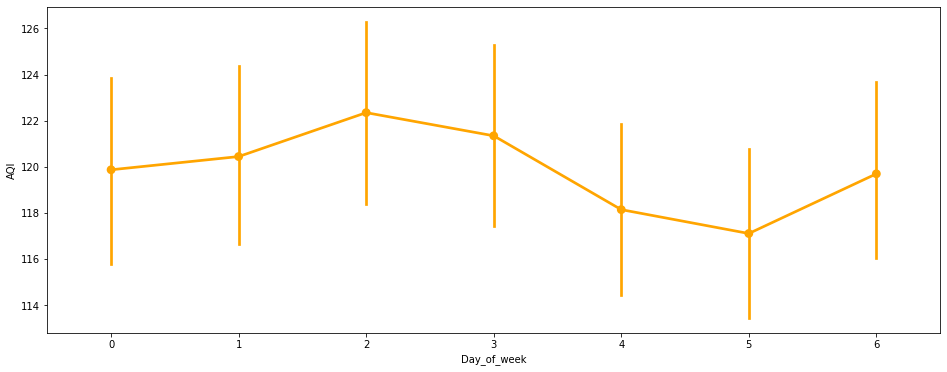

In [69]:
fig= plt.figure(figsize=(16,6))
s.pointplot(data=data1,x='Day_of_week',y='AQI',color='orange')

In [70]:
data.AQI_Bucket.unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

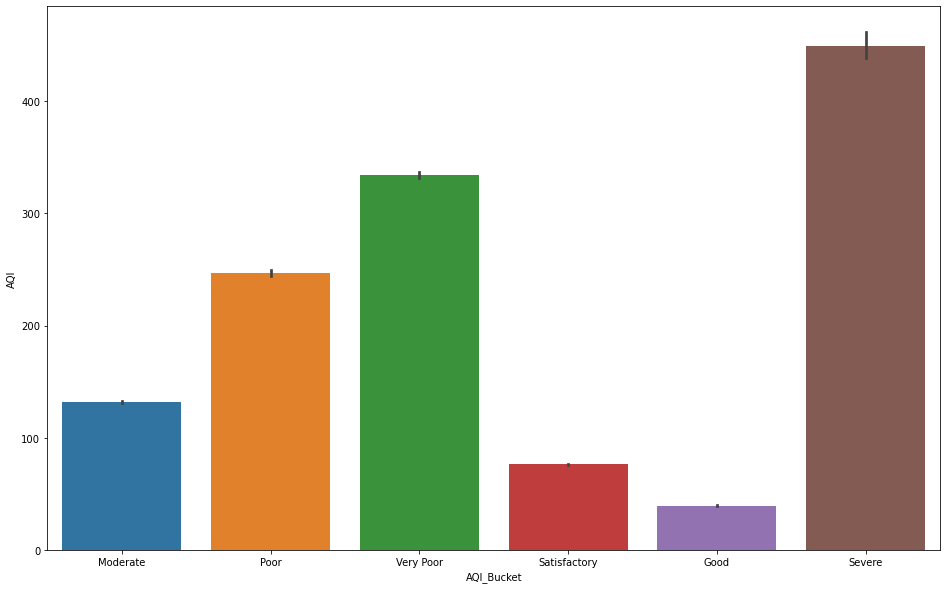

In [71]:
import matplotlib.pyplot as plt
import seaborn as s

fig,ax=plt.subplots(figsize=(16,10))
ax=s.barplot(x='AQI_Bucket',y='AQI', data=data)
plt.show

##  AIR QUALITY BUCKET CLASSIFICATION USING DECISION TREE ##

In [87]:
%%time
#Importing useful libraries
import pandas as pd
#import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
mydata=New_data
X=mydata.drop(columns='AQI_Bucket')
y=mydata['AQI_Bucket']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions=model.predict(X_test)

A=[[y_test],[predictions]]
score1=accuracy_score(y_test,predictions)

#tree.export_graphviz(model,out_file='music_recommender.dot',feature_names=['age','sex'],class_names=sorted(y.unique()),label='all',rounded=True,filled=True)
score1

CPU times: user 110 ms, sys: 3.8 ms, total: 113 ms
Wall time: 118 ms


0.769268056228793

## AIR QUALITY BUCKET CLASSIFICATION USING NAIVE BAYES ##

In [88]:
%%time
X=mydata.iloc[:,[0,1,2,3,4,5,6]].values
y=mydata.iloc[:,7].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#Feature scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Fitting Naive Bayes Classification using linear Kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,y_train)
#Predicting test set results
y_pred=nvclassifier.predict(X_test)

score2=accuracy_score(y_test,y_pred)
score2

CPU times: user 29.4 ms, sys: 3.58 ms, total: 32.9 ms
Wall time: 41.8 ms


0.7862336403296171

## AIR QUALITY BUCKET CLASSIFICATION USING K-NEAREST NEIGHBORS ##

In [134]:
%%time
from sklearn.neighbors import KNeighborsClassifier
#Training and predicting
knnmodel=KNeighborsClassifier(n_neighbors=8) 
knnmodel.fit(X_train,y_train)
y_pred=knnmodel.predict(X_test) 
score3=accuracy_score(y_test,y_pred)
score3

CPU times: user 181 ms, sys: 2.93 ms, total: 184 ms
Wall time: 194 ms


0.8245273873000485

In [129]:

knnmodel=[KNeighborsClassifier(n_neighbors=i) for i in range(1,101)]
fit=[knnmodel[i].fit(X_train,y_train) for i in range(len(knnmodel))]
y_pred=[knnmodel[i].predict(X_test) for i in range(len(knnmodel)) ]
score3=[accuracy_score(y_test,y_pred[i]) for i in range(len(knnmodel)) ]

CPU times: user 21 s, sys: 333 ms, total: 21.4 s
Wall time: 21.8 s


In [130]:
for i in range(len(score3)):
    if (score3[i]==max(score3)):
        k=i+1
        print([k,max(score3)])

[8, 0.8245273873000485]


Text(0, 0.5, 'accuracy_score')

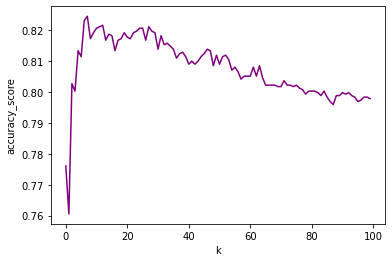

In [131]:
import matplotlib.pyplot as plt
index=[i for i in range(len(knnmodel))]
plt.plot(index,score3, color='purple')
plt.xlabel('k')
plt.ylabel('accuracy_score')

In [127]:
x=[score1*100,score2*100,max(score3)*100]
x

[76.9268056228793, 78.6233640329617, 82.45273873000485]